## D-shaped tokamak

$$ R = R_0 (1 + \epsilon\cos(\theta+\delta\sin\theta)) $$
$$ \phi = -\varphi $$
$$ Z = R_0 \kappa\epsilon\sin\theta $$

In [42]:
import lec
import lec.toroidalField
import lec.geometry

import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt

In [43]:
r0 = 1                    # major radius
epsilon = 0.1             # aspect ratio
kappa = 2                 # elongation
delta = 0.5               # triangularity
iota = 1

funR = lambda theta: r0 * (1 + epsilon * np.cos(theta+delta*np.sin(theta)))
funZ = lambda theta: r0 * kappa * epsilon *np.sin(theta) 

In [44]:
nfp = 1
sampleNumsTheta, sampleNumsPhi = 5, 1
deltaTheta = 2*np.pi / (2*sampleNumsTheta+1)
deltaVarPhi = 2*np.pi / nfp / (2*sampleNumsPhi+1)
sampleTheta, sampleVarPhi = np.arange(2*sampleNumsTheta+1)*deltaTheta, np.arange(2*sampleNumsPhi+1)*deltaVarPhi
gridSampleVarPhi, gridSampleTheta = np.meshgrid(sampleVarPhi, sampleTheta)
sampleR = funR(gridSampleTheta)
sampleZ = funZ(gridSampleTheta)

fieldR = lec.toroidalField.fftToroidalField(sampleR, nfp=nfp)
fieldZ = lec.toroidalField.fftToroidalField(sampleZ, nfp=nfp)

surfTokamak = lec.geometry.Surface(fieldR, fieldZ)

In [45]:
def getAveG():
    from scipy.integrate import quad
    def getG(theta):
        return 1 / np.power(1+epsilon*np.cos(theta+delta*np.sin(theta)),2)
    return quad(getG, 0, 2*np.pi)[0] / np.pi / 2

In [46]:
surfaceProblem = lec.SurfaceEquilibrium(surfTokamak, iota=iota, aveJacobian=getAveG())

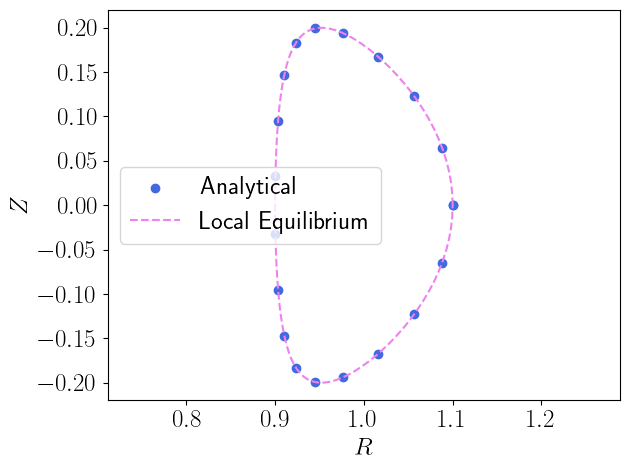

In [47]:
fig, ax = plt.subplots()
ax.scatter(funR(np.linspace(0, 2*np.pi, 20)), funZ(np.linspace(0, 2*np.pi, 20)), c = "royalblue", label="Analytical")
ax.plot(
    surfaceProblem.surf.r.getValue(np.linspace(0,2*np.pi,100),np.zeros(100)).flatten(), 
    surfaceProblem.surf.z.getValue(np.linspace(0,2*np.pi,100),np.zeros(100)).flatten(), 
    c = "violet", 
    ls = "--", 
    label = "Local Equilibrium"
)
ax.legend(fontsize=18)
ax.set_xlabel(r"$R$", fontsize=18)
ax.set_ylabel(r"$Z$", fontsize=18)
_, _ = plt.xticks(fontsize=18), plt.yticks(fontsize=18)
_ = plt.axis("equal")
fig.tight_layout()

In [48]:
surfaceProblem.run()

$$ \sqrt{g} = (1+\epsilon\cos(\theta+\delta\sin\theta))^2 $$

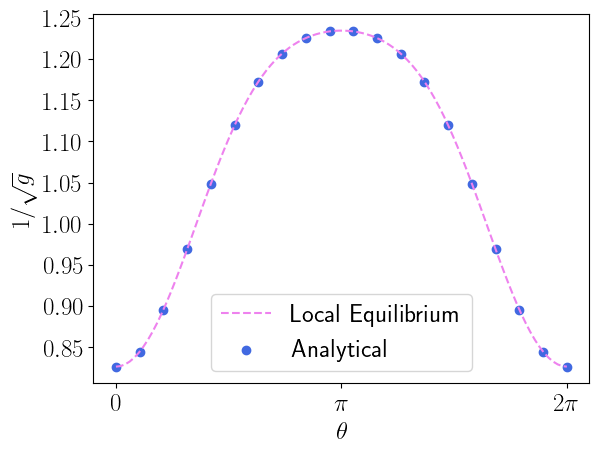

In [49]:
fig, ax = plt.subplots() 
ax.plot(
    np.linspace(0,2*np.pi,100), surfaceProblem.Jacobian.getValue(np.linspace(0,2*np.pi,100),np.zeros(100)).flatten(), 
    c = "violet", 
    ls = "--", 
    label = "Local Equilibrium"
)
ax.scatter(
    np.linspace(0,2*np.pi,20), 
    1/np.power(1+epsilon*np.cos(np.linspace(0,2*np.pi,20)+delta*np.sin(np.linspace(0,2*np.pi,20))),2), 
    c = "royalblue", 
    label = "Analytical"
)
ax.legend(fontsize=18)
ax.set_xlabel(r"$\theta$", fontsize=18)
ax.set_ylabel(r"$1/\sqrt{g}$", fontsize=18)
ax.set_xticks(np.linspace(0, 2*np.pi, 3))
ax.set_xticklabels(["$0$", r"$\pi$", r"$2\pi$"], fontsize=18)
_ = plt.yticks(fontsize=18)